In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21613, 21)

In [ ]:
import pandas as pd

df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.drop(columns=['date'], inplace=True)
print(df)


               id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
0         1.0           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
len(df.columns)

22

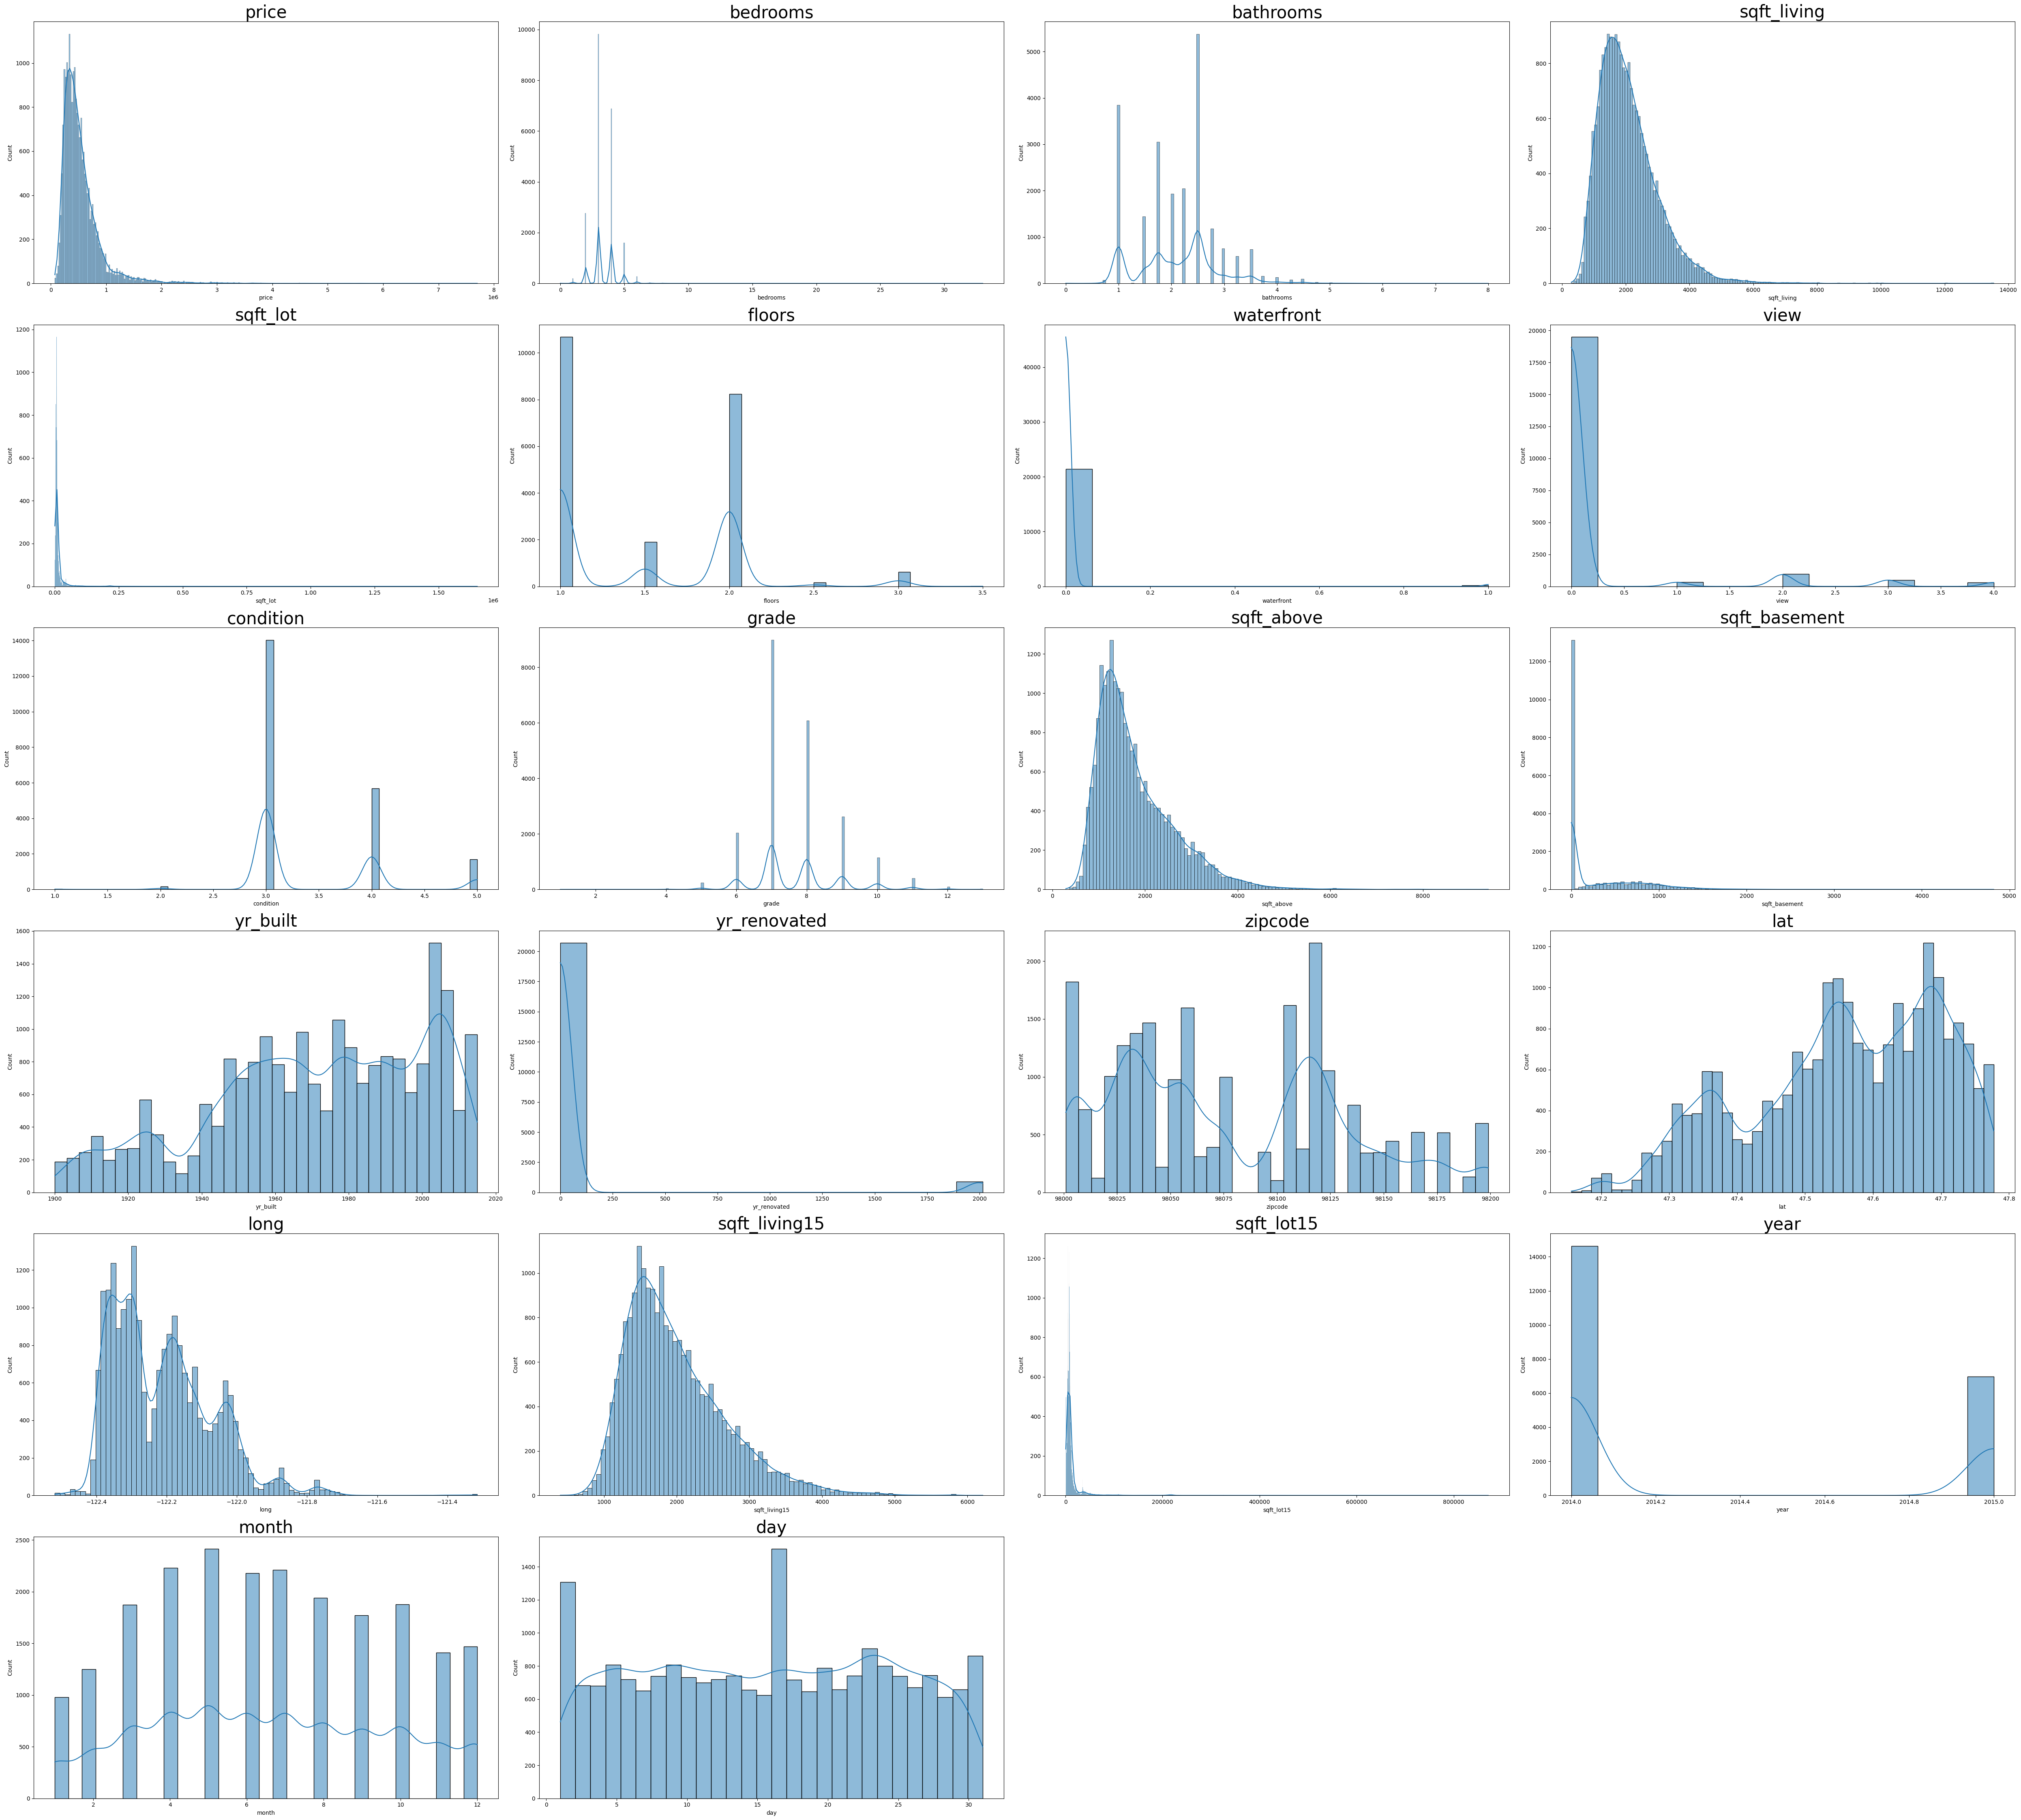

In [ ]:
num_features = len(df.columns)
num_rows = (num_features // 4) + (1 if num_features % 4 != 0 else 0)

fig, axs = plt.subplots(num_rows, 4, figsize=(50, num_rows * 7.5))
count = 0
cols = df.columns.to_list()

for i in range(num_rows):
    for j in range(4):
        if count < num_features:
            sns.histplot(df[cols[count]], ax=axs[i, j], kde=True)
            axs[i, j].set_title(cols[count], fontsize=30)
            count += 1
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

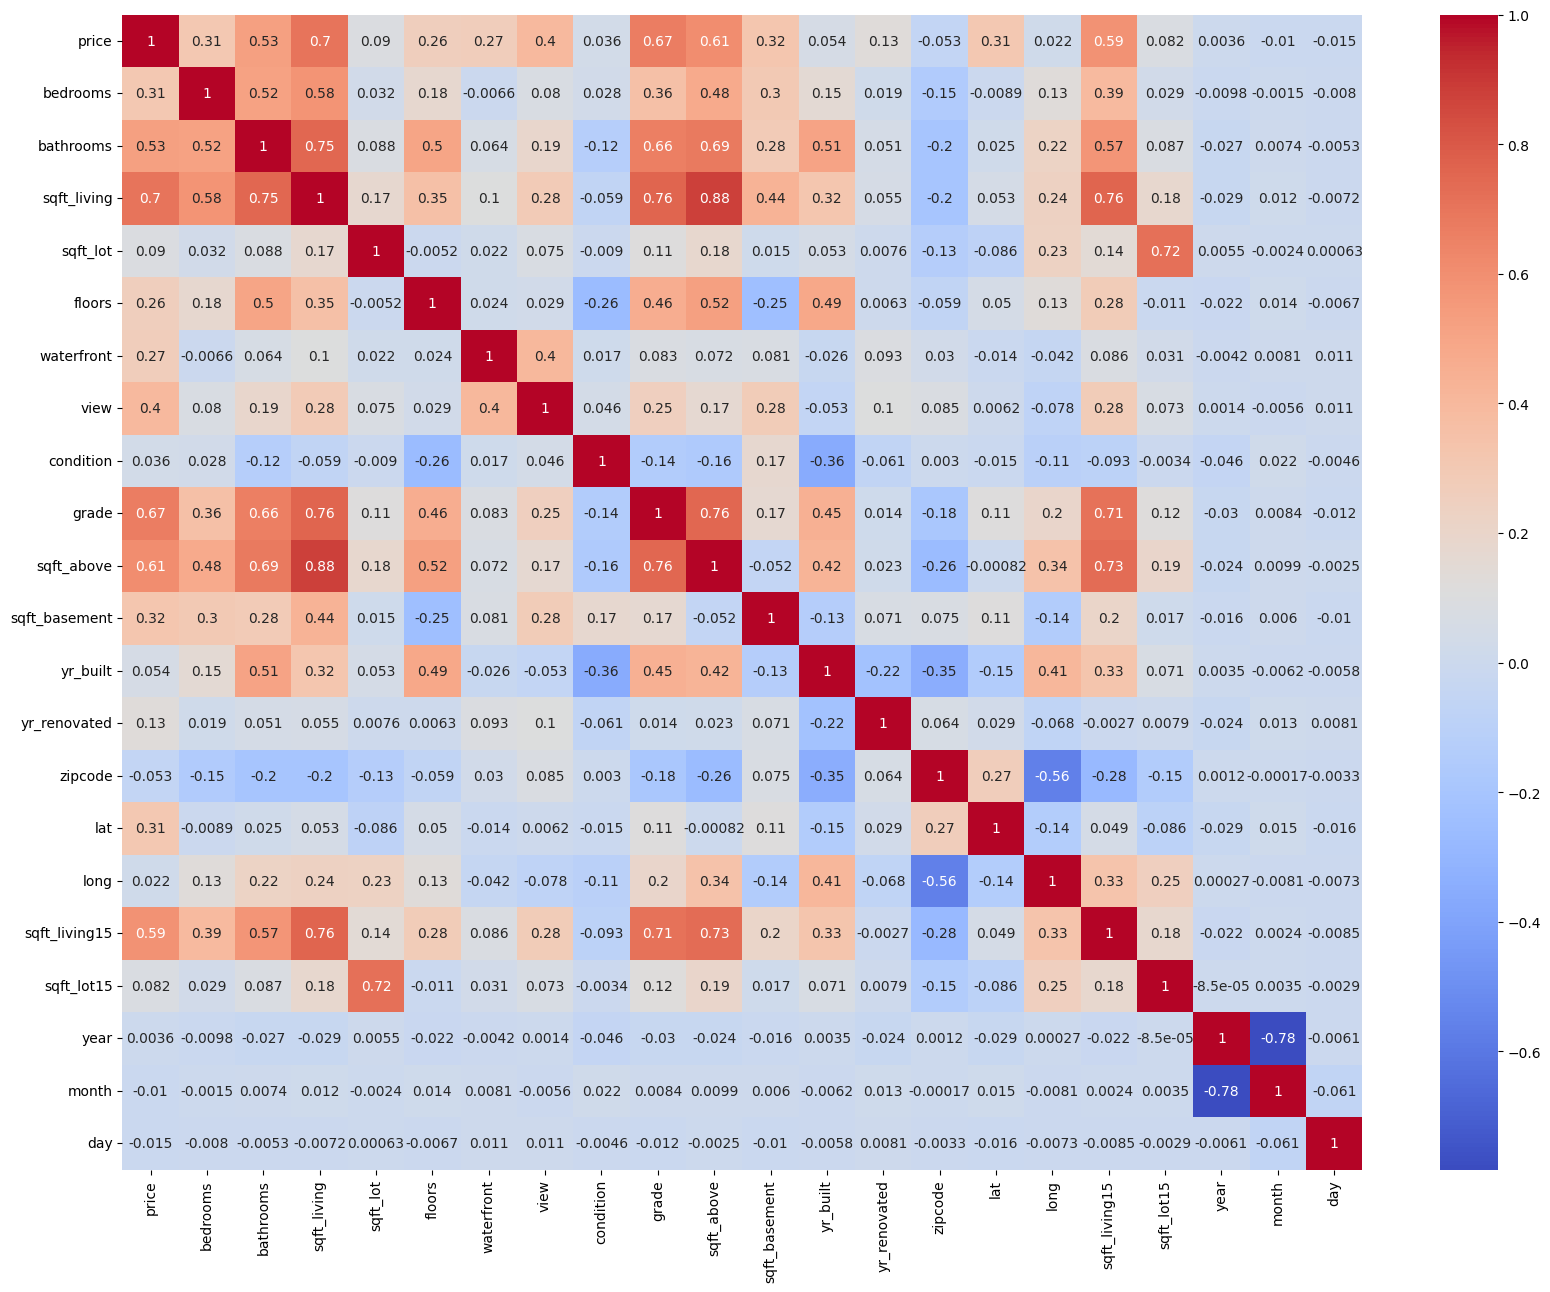

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.show()

In [ ]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

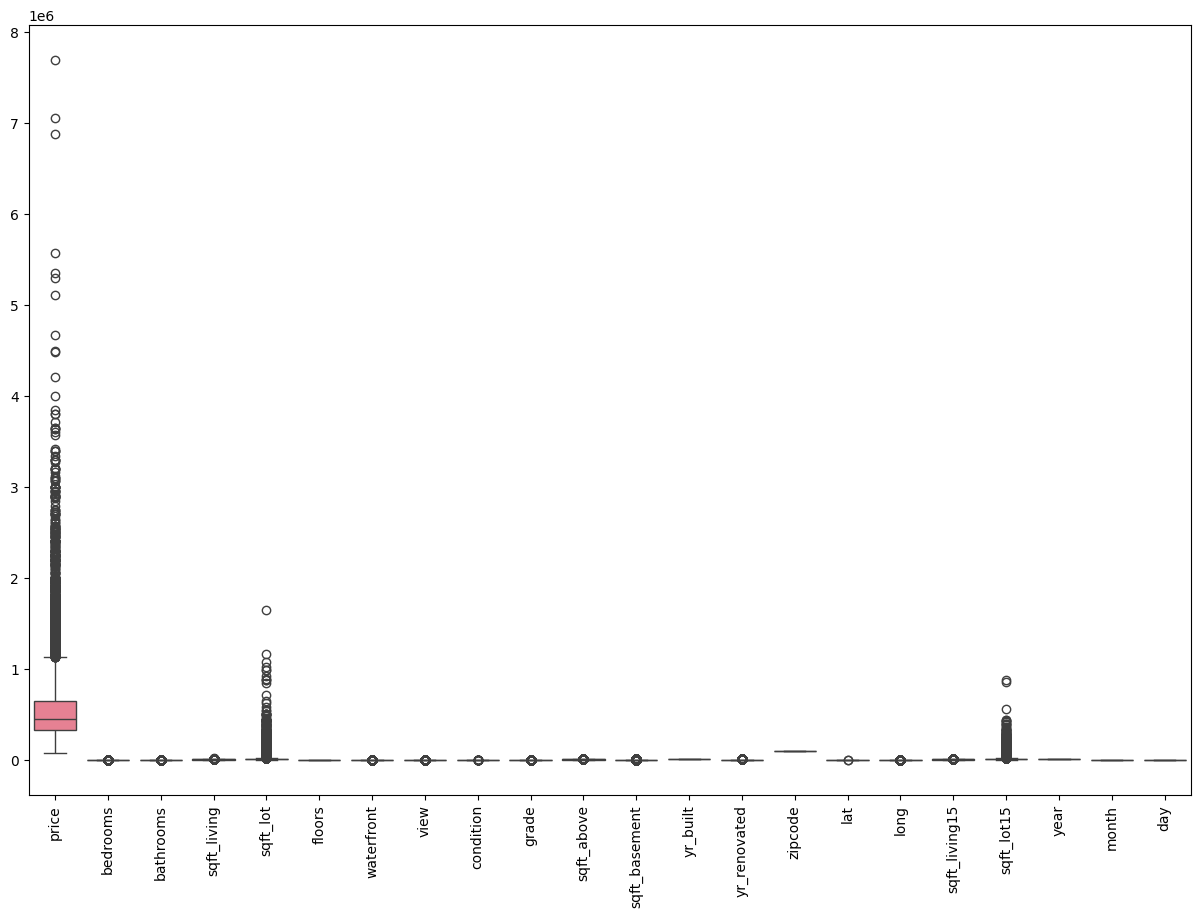

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.drop(columns=['sqft_lot','sqft_lot15'], inplace=True)

In [ ]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

df= remove_outliers_iqr(df)

In [ ]:
df.shape

(16367, 20)

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['price']).values
y = df['price'].values
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
y_scaled=sc.fit_transform(y.reshape(-1,1))
X=X_scaled

#y=y_scaled

In [ ]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


kf = RepeatedKFold(n_splits=2, n_repeats=3, random_state=33)  # Use RepeatedKFold for repeat K-fold cross-validation
me_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []
r2_list = []

me_scores_edit = []
mae_scores_edit = []
mse_scores_edit = []
rmse_scores_edit = []
r2_list_edit = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    linear_regressor = LinearRegression().fit(X_train, y_train)
    y_pred = linear_regressor.predict(X_test)


    me = np.mean(y_test - y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    me_scores.append(me)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_list.append(r2)


print("Metrics for Original Features (X):")
print(f"Mean Error (ME): {np.mean(me_scores)}")
print(f"Mean Absolute Error (MAE): {np.mean(mae_scores)}")
print(f"Root Mean Squared Error (RMSE): {np.mean(rmse_scores)}")
print(f"Mean Squared Error (MSE): {np.mean(mse_scores)}")
print(f"R-squared: {np.mean(r2_list)}")

joblib.dump(linear_regressor, 'linear_regressor.pkl')


Metrics for Original Features (X):
Mean Error (ME): -16.67563211247163
Mean Absolute Error (MAE): 81945.9123296547
Root Mean Squared Error (RMSE): 108465.64108716545
Mean Squared Error (MSE): 11764938236.74817
R-squared: 0.638264489804839


['linear_regressor.pkl']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

n_splits = 5
n_repeats = 3

rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

scaler = StandardScaler()

knn_model = KNeighborsRegressor(n_neighbors=9)
knn_model_edit = KNeighborsRegressor(n_neighbors=9)

metrics = {
    'mae': [], 'mse': [], 'rmse': [], 'r2': [], 'knn_score': [],
}

for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn_regressor = KNeighborsRegressor().fit(X_train, y_train)

    y_pred = knn_regressor.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    knn_score = knn_regressor.score(X_test, y_test)

    metrics['mae'].append(mae)
    metrics['mse'].append(mse)
    metrics['rmse'].append(rmse)
    metrics['r2'].append(r2)
    metrics['knn_score'].append(knn_score)



average_metrics = {k: np.mean(v) for k, v in metrics.items()}

print("Average Metrics for Original Features (X):")
print(f"Mean Absolute Error (MAE): {average_metrics['mae']}")
print(f"Mean Squared Error (MSE): {average_metrics['mse']}")
print(f"Root Mean Squared Error (RMSE): {average_metrics['rmse']}")
print(f"R-squared (R2): {average_metrics['r2']}")
print(f"KNN Score: {average_metrics['knn_score']}")

joblib.dump(knn_regressor, 'knn_regressor.pkl')


Average Metrics for Original Features (X):
Mean Absolute Error (MAE): 69206.19051592654
Mean Squared Error (MSE): 9509812824.707708
Root Mean Squared Error (RMSE): 97498.24056727253
R-squared (R2): 0.7074694963485124
KNN Score: 0.7074694963485124


['knn_regressor.pkl']

In [ ]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

kf = RepeatedKFold(n_splits=2, n_repeats=3, random_state=33)
me_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []
r2_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    random_forest_regressor = RandomForestRegressor(random_state=33).fit(X_train, y_train)
    y_pred = random_forest_regressor.predict(X_test)

    me = np.mean(y_test - y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    me_scores.append(me)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_list.append(r2)

print("Metrics for Random Forest Regressor (X):")
print(f"Mean Error (ME): {np.mean(me_scores)}")
print(f"Mean Absolute Error (MAE): {np.mean(mae_scores)}")
print(f"Root Mean Squared Error (RMSE): {np.mean(rmse_scores)}")
print(f"Mean Squared Error (MSE): {np.mean(mse_scores)}")
print(f"R-squared: {np.mean(r2_list)}")
joblib.dump(random_forest_regressor, 'random_forest_regressor.pkl')

Metrics for Random Forest Regressor (X):
Mean Error (ME): 69.79538816216193
Mean Absolute Error (MAE): 49665.11175543608
Root Mean Squared Error (RMSE): 71388.85116620066
Mean Squared Error (MSE): 5096607303.033505
R-squared: 0.8432980111996713


['random_forest_regressor.pkl']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Initialize variables
n_splits = 5
n_repeats = 3

rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
scaler = StandardScaler()

# Initialize models
knn_model = KNeighborsRegressor(n_neighbors=9)
lasso_model = Lasso()
ridge_model = Ridge()

# Initialize metrics dictionaries
lasso_metrics = {'mae': [], 'mse': [], 'rmse': [], 'r2': [], 'score': []}
ridge_metrics = {'mae': [], 'mse': [], 'rmse': [], 'r2': [], 'score': []}




for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)

    lasso_metrics['mae'].append(mean_absolute_error(y_test, y_pred_lasso))
    lasso_metrics['mse'].append(mean_squared_error(y_test, y_pred_lasso))
    lasso_metrics['rmse'].append(np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
    lasso_metrics['r2'].append(r2_score(y_test, y_pred_lasso))
    lasso_metrics['score'].append(lasso_model.score(X_test, y_test))

# Calculate average metrics for Lasso
average_lasso_metrics = {k: np.mean(v) for k, v in lasso_metrics.items()}

print("Average Metrics for Lasso:")
print(f"Mean Absolute Error (MAE): {average_lasso_metrics['mae']}")
print(f"Mean Squared Error (MSE): {average_lasso_metrics['mse']}")
print(f"Root Mean Squared Error (RMSE): {average_lasso_metrics['rmse']}")
print(f"R-squared (R2): {average_lasso_metrics['r2']}")
print(f"Lasso Score: {average_lasso_metrics['score']}")

# Save Lasso model
joblib.dump(lasso_model, 'lasso_regressor.pkl')

# Run cross-validation and compute metrics for Ridge
for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)

    ridge_metrics['mae'].append(mean_absolute_error(y_test, y_pred_ridge))
    ridge_metrics['mse'].append(mean_squared_error(y_test, y_pred_ridge))
    ridge_metrics['rmse'].append(np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
    ridge_metrics['r2'].append(r2_score(y_test, y_pred_ridge))
    ridge_metrics['score'].append(ridge_model.score(X_test, y_test))

# Calculate average metrics for Ridge
average_ridge_metrics = {k: np.mean(v) for k, v in ridge_metrics.items()}

print("Average Metrics for Ridge:")
print(f"Mean Absolute Error (MAE): {average_ridge_metrics['mae']}")
print(f"Mean Squared Error (MSE): {average_ridge_metrics['mse']}")
print(f"Root Mean Squared Error (RMSE): {average_ridge_metrics['rmse']}")
print(f"R-squared (R2): {average_ridge_metrics['r2']}")
print(f"Ridge Score: {average_ridge_metrics['score']}")

# Save Ridge model
joblib.dump(ridge_model, 'ridge_regressor.pkl')


Average Metrics for Lasso:
Mean Absolute Error (MAE): 81931.14606452496
Mean Squared Error (MSE): 11761499118.473278
Root Mean Squared Error (RMSE): 108438.79622519268
R-squared (R2): 0.638183398856967
Lasso Score: 0.638183398856967
Average Metrics for Ridge:
Mean Absolute Error (MAE): 81931.00297815715
Mean Squared Error (MSE): 11761499242.512117
Root Mean Squared Error (RMSE): 108438.79627397178
R-squared (R2): 0.6381834112518256
Ridge Score: 0.6381834112518256


['ridge_regressor.pkl']

In [ ]:
df.shape

(16367, 20)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'year',
       'month', 'day'],
      dtype='object')

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,year,month,day
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,2014,10,13
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,2015,2,25
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,2014,12,9
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,2015,2,18
6,257500.0,3,2.25,1715,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,2014,6,27
